In [ ]:
!pip install Ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.5/974.5 kB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 18.6 MB/s eta 0:00:00


In [ ]:
import kagglehub

# Tải về bộ dữ liệu biển số
path = kagglehub.dataset_download("fareselmenshawii/license-plate-dataset")

print("📁 Đường dẫn đến thư mục dữ liệu đã tải:", path)

100%|██████████| 1.54G/1.54G [00:12<00:00, 131MB/s]

Extracting files...


📁 Đường dẫn đến thư mục dữ liệu đã tải: /root/.cache/kagglehub/datasets/fareselmenshawii/license-plate-dataset/versions/1


In [ ]:
import os

print("🔍 Số ảnh:", len(os.listdir(f"{path}/images/train")))
print("🔍 Số nhãn:", len(os.listdir(f"{path}/labels/train")))

🔍 Số ảnh: 4295
🔍 Số nhãn: 4295


In [ ]:
import os, shutil

# ✅ Sửa lại đường dẫn gốc
root = "/root/.cache/kagglehub/datasets/fareselmenshawii/license-plate-dataset/versions/1"

# Thư mục mới để chứa tập dữ liệu nhỏ
output_root = "mini_dataset"
for split in ["train", "val"]:
    os.makedirs(f"{output_root}/images/{split}", exist_ok=True)
    os.makedirs(f"{output_root}/labels/{split}", exist_ok=True)

# Hàm chọn 1/5 ảnh và sao chép
def copy_subset(split):
    img_src = f"{root}/images/{split}"
    lbl_src = f"{root}/labels/{split}"
    img_dst = f"{output_root}/images/{split}"
    lbl_dst = f"{output_root}/labels/{split}"

    files = sorted(os.listdir(img_src))
    subset = files[:len(files)//5]

    for f in subset:
        shutil.copy(os.path.join(img_src, f), os.path.join(img_dst, f))
        lbl = f.replace(".jpg", ".txt")
        shutil.copy(os.path.join(lbl_src, lbl), os.path.join(lbl_dst, lbl))

copy_subset("train")
copy_subset("val")

print("✅ Đã tạo tập mini_dataset với 1/5 ảnh train + val.")


✅ Đã tạo tập mini_dataset với 1/5 ảnh train + val.


In [ ]:
yaml_content = """
path: /root/.cache/kagglehub/datasets/fareselmenshawii/license-plate-dataset/versions/1
train: images/train
val: images/val
names:
  0: license_plate
"""

with open("license_plate.yaml", "w") as f:
    f.write(yaml_content)

print("✅ Đã cập nhật đường dẫn trong license_plate.yaml")


✅ Đã cập nhật đường dẫn trong license_plate.yaml


In [ ]:
import cv2
import os
from pathlib import Path

# Đường dẫn đến thư mục chứa dữ liệu
base_dir = Path("/content/mini_dataset")
image_dirs = [base_dir / "images" / "train", base_dir / "images" / "val"]

# Tỷ lệ ảnh cần làm mờ
blur_ratio = 0.3

# Hàm làm mờ ảnh bằng Gaussian blur
def blur_image(input_path):
    img = cv2.imread(str(input_path))
    if img is not None:
        blurred = cv2.GaussianBlur(img, (7, 7), 0)
        cv2.imwrite(str(input_path), blurred)

# Thực hiện làm mờ ảnh cuối cùng
for image_dir in image_dirs:
    if not image_dir.exists():
        print(f"⚠️ Không tìm thấy thư mục: {image_dir}")
        continue
    images = sorted(list(image_dir.glob("*.jpg")) + list(image_dir.glob("*.png")))

    if not images:
        print(f"⚠️ Không tìm thấy ảnh trong {image_dir}")
        continue

    num_to_blur = int(len(images) * blur_ratio)
    images_to_blur = images[-num_to_blur:]  # Lấy 30% ảnh cuối

    for img_path in images_to_blur:
        blur_image(img_path)

    print(f"✅ Đã làm mờ {len(images_to_blur)} ảnh cuối trong {image_dir}")


✅ Đã làm mờ 257 ảnh cuối trong /content/mini_dataset/images/train
✅ Đã làm mờ 64 ảnh cuối trong /content/mini_dataset/images/val


In [ ]:
results = model.train(data="license_plate.yaml", epochs=20, imgsz=640)

Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=bienso.pt, data=license_plate.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, fo

train: Scanning /root/.cache/kagglehub/datasets/fareselmenshawii/license-plate-dataset/versions/1/labels/train... 4295 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4295/4295 [00:02<00:00, 1566.43it/s]


train: New cache created: /root/.cache/kagglehub/datasets/fareselmenshawii/license-plate-dataset/versions/1/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /root/.cache/kagglehub/datasets/fareselmenshawii/license-plate-dataset/versions/1/labels/val... 1073 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1073/1073 [00:01<00:00, 920.33it/s] 


val: New cache created: /root/.cache/kagglehub/datasets/fareselmenshawii/license-plate-dataset/versions/1/labels/val.cache
Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      2.31G      1.498     0.9403      1.137         20        640: 100%|██████████| 269/269 [01:39<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:13<00:00,  2.55it/s]

                   all       1073       1573       0.82      0.699      0.754      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.16G      1.519     0.9871      1.145         17        640: 100%|██████████| 269/269 [01:32<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.75it/s]


                   all       1073       1573      0.798      0.708      0.765      0.403

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20      3.16G      1.545      1.003      1.148         17        640: 100%|██████████| 269/269 [01:30<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.73it/s]


                   all       1073       1573      0.825      0.711      0.766      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.16G      1.538      1.012      1.146         15        640: 100%|██████████| 269/269 [01:30<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.71it/s]

                   all       1073       1573      0.819      0.726      0.781      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.16G       1.52     0.9767      1.147         25        640: 100%|██████████| 269/269 [01:31<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.80it/s]


                   all       1073       1573      0.814      0.697      0.773      0.401

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.16G      1.493     0.9546       1.13          9        640: 100%|██████████| 269/269 [01:30<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.78it/s]

                   all       1073       1573      0.802      0.727      0.773      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.16G      1.477     0.9056      1.126         12        640: 100%|██████████| 269/269 [01:31<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.75it/s]


                   all       1073       1573      0.832      0.765      0.809      0.419

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.17G      1.453     0.9071      1.115         15        640: 100%|██████████| 269/269 [01:31<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.75it/s]


                   all       1073       1573      0.846      0.731        0.8      0.413

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.18G      1.449     0.8791      1.102         14        640: 100%|██████████| 269/269 [01:30<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.80it/s]

                   all       1073       1573      0.837      0.736      0.811      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      3.19G       1.44     0.8721      1.099         10        640: 100%|██████████| 269/269 [01:30<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.78it/s]

                   all       1073       1573       0.82      0.779      0.828      0.436


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.21G      1.441     0.8168      1.108          9        640: 100%|██████████| 269/269 [01:28<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:11<00:00,  2.95it/s]


                   all       1073       1573      0.805      0.767      0.808      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      3.23G       1.43      0.799      1.105         11        640: 100%|██████████| 269/269 [01:26<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.77it/s]

                   all       1073       1573      0.855      0.723      0.814      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      3.25G       1.41     0.7869      1.085         11        640: 100%|██████████| 269/269 [01:26<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.83it/s]


                   all       1073       1573      0.864      0.734      0.825      0.433

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.26G      1.409     0.7702      1.087          9        640: 100%|██████████| 269/269 [01:25<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.80it/s]

                   all       1073       1573      0.839      0.769      0.833      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.28G      1.391     0.7585      1.079          9        640: 100%|██████████| 269/269 [01:26<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.81it/s]

                   all       1073       1573      0.861      0.773      0.839      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20       3.3G      1.381     0.7414      1.072         10        640: 100%|██████████| 269/269 [01:26<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:15<00:00,  2.17it/s]


                   all       1073       1573      0.833      0.783      0.836      0.456

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      3.32G      1.359     0.7236      1.067         10        640: 100%|██████████| 269/269 [01:29<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.74it/s]

                   all       1073       1573       0.87      0.758      0.842      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      3.32G      1.356     0.7064      1.068          8        640: 100%|██████████| 269/269 [01:27<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.79it/s]

                   all       1073       1573      0.841      0.783      0.836       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.35G      1.343     0.6916      1.054          8        640: 100%|██████████| 269/269 [01:26<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.70it/s]


                   all       1073       1573      0.842      0.794      0.849      0.463

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      3.37G      1.325      0.685      1.056         12        640: 100%|██████████| 269/269 [01:26<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:12<00:00,  2.74it/s]


                   all       1073       1573      0.847      0.793      0.845      0.464

20 epochs completed in 0.571 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 34/34 [00:14<00:00,  2.30it/s]


                   all       1073       1573      0.846      0.794      0.844      0.464
Speed: 0.2ms preprocess, 2.3ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train2


In [ ]:
model.save("bienso.pt")

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Load models ===
vehicle_model = YOLO("phuongtien.pt")
plate_model = YOLO("bienso.pt")

# === 2. Load test image ===
img_path = "traf.jpg"
image = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h_img, w_img = image.shape[:2]

# === 3. Step 1: Detect vehicle ===
vehicle_results = vehicle_model.predict(image_rgb, conf=0.5, verbose=False)[0]
vehicle_img = image_rgb.copy()

vehicle_crops = []      # lưu thông tin vùng phương tiện [(crop, x1, y1)]
for box in vehicle_results.boxes:
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    x1, y1 = max(0, x1), max(0, y1)
    x2, y2 = min(w_img, x2), min(h_img, y2)

    # Vẽ khung phương tiện
    cv2.rectangle(vehicle_img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(vehicle_img, "vehicle", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    crop = image_rgb[y1:y2, x1:x2]
    vehicle_crops.append((crop, x1, y1))  # lưu crop và vị trí góc trên trái

# === 4. Step 2: Detect plates trong từng vùng phương tiện ===
plate_img = image_rgb.copy()  # ảnh để vẽ biển số cuối cùng

for crop, offset_x, offset_y in vehicle_crops:
    plate_results = plate_model.predict(crop, conf=0.4, verbose=False)[0]

    for plate_box in plate_results.boxes:
        px1, py1, px2, py2 = map(int, plate_box.xyxy[0])

        # Chuyển toạ độ về ảnh gốc
        gx1, gy1 = offset_x + px1, offset_y + py1
        gx2, gy2 = offset_x + px2, offset_y + py2

        # Vẽ lên ảnh plate_img
        cv2.rectangle(plate_img, (int(gx1), int(gy1)), (int(gx2), int(gy2)), (0, 255, 0), 2)
        cv2.putText(plate_img, "plate", (int(gx1), int(gy1) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# === 5. Hiển thị kết quả ===
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(vehicle_img)
plt.title("Step 1: Vehicle Detection")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(plate_img)
plt.title("Step 2: Plate Detection on Vehicles")
plt.axis("off")

plt.tight_layout()
plt.show()


error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


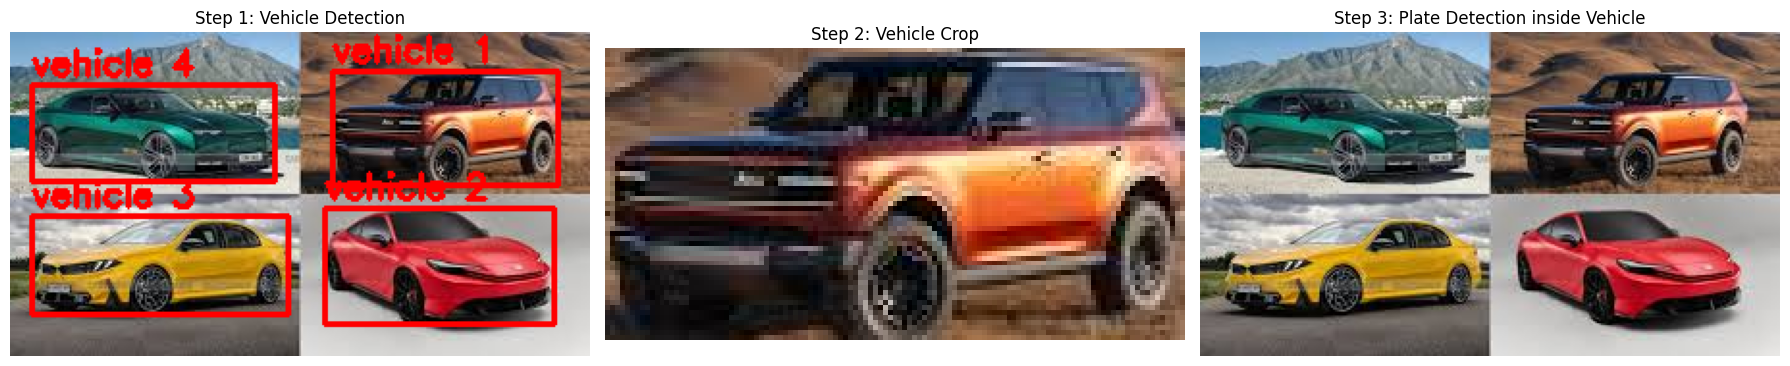

In [ ]:
from ultralytics import YOLO
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Load models ===
vehicle_model = YOLO("phuongtien.pt")
plate_model = YOLO("bienso.pt")

# === 2. Load test image ===
img_path = "car2.jpg"
image = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
h_img, w_img = image.shape[:2]

# === 3. Step 1: Detect vehicle ===
vehicle_results = vehicle_model.predict(image_rgb, conf=0.5, verbose=False)[0]
vehicle_img = image_rgb.copy()

vehicle_crops = []  # danh sách crop phương tiện [(crop_img, x1, y1, x2, y2)]
for i, box in enumerate(vehicle_results.boxes):
    x1, y1, x2, y2 = map(int, box.xyxy[0])
    x1, y1 = max(0, x1), max(0, y1)
    x2, y2 = min(w_img, x2), min(h_img, y2)

    # Vẽ khung phương tiện lên ảnh
    cv2.rectangle(vehicle_img, (x1, y1), (x2, y2), (255, 0, 0), 2)
    cv2.putText(vehicle_img, f"vehicle {i+1}", (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

    crop = image_rgb[y1:y2, x1:x2]
    vehicle_crops.append((crop, x1, y1))

# === 4. Step 2: Detect plates từ crop phương tiện ===
plate_img = image_rgb.copy()
for i, (crop, offset_x, offset_y) in enumerate(vehicle_crops):
    plate_results = plate_model.predict(crop, conf=0.4, verbose=False)[0]

    for plate_box in plate_results.boxes:
        px1, py1, px2, py2 = map(int, plate_box.xyxy[0])
        gx1, gy1 = offset_x + px1, offset_y + py1
        gx2, gy2 = offset_x + px2, offset_y + py2

        cv2.rectangle(plate_img, (int(gx1), int(gy1)), (int(gx2), int(gy2)), (0, 255, 0), 2)
        cv2.putText(plate_img, "plate", (int(gx1), int(gy1) - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# === 5. Hiển thị kết quả 3 bước ===
plt.figure(figsize=(18, 6))

# Ảnh 1: Phát hiện phương tiện
plt.subplot(1, 3, 1)
plt.imshow(vehicle_img)
plt.title("Step 1: Vehicle Detection")
plt.axis("off")

# Ảnh 2: Các crop phương tiện (hiển thị tối đa 1-2)
if vehicle_crops:
    crop_show = vehicle_crops[0][0]  # chỉ hiển thị crop đầu tiên
    plt.subplot(1, 3, 2)
    plt.imshow(crop_show)
    plt.title("Step 2: Vehicle Crop")
    plt.axis("off")
else:
    plt.subplot(1, 3, 2)
    plt.text(0.5, 0.5, 'No vehicle detected', ha='center')
    plt.axis("off")

# Ảnh 3: Phát hiện biển số
plt.subplot(1, 3, 3)
plt.imshow(plate_img)
plt.title("Step 3: Plate Detection inside Vehicle")
plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import kagglehub
dataset_path = kagglehub.dataset_download("andrewmvd/car-plate-detection")

print("✅ Dataset đã được tải tại:", dataset_path)

✅ Dataset đã được tải tại: /kaggle/input/car-plate-detection


In [ ]:
import os
import xml.etree.ElementTree as ET
import shutil

# === Đường dẫn gốc đến dữ liệu đã tải từ KaggleHub ===
root_dir = dataset_path
image_dir = os.path.join(root_dir, "images")
annotation_dir = os.path.join(root_dir, "annotations")

# === Tạo thư mục đầu ra ===
output_dir = "/content/yolo_plate_test"
images_dir = os.path.join(output_dir, "images")
labels_dir = os.path.join(output_dir, "labels")
os.makedirs(images_dir, exist_ok=True)
os.makedirs(labels_dir, exist_ok=True)

# === Hàm chuyển XML sang YOLO format ===
def convert_annotation(xml_file, label_output_path, image_output_path):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    filename = root.find("filename").text
    image_path = os.path.join(image_dir, filename)

    if not os.path.exists(image_path):
        print(f"❌ Ảnh không tồn tại: {filename}")
        return

    size = root.find("size")
    img_w = int(size.find("width").text)
    img_h = int(size.find("height").text)

    yolo_labels = []
    for obj in root.findall("object"):
        if obj.find("name").text != "licence":
            continue
        bbox = obj.find("bndbox")
        xmin = int(bbox.find("xmin").text)
        ymin = int(bbox.find("ymin").text)
        xmax = int(bbox.find("xmax").text)
        ymax = int(bbox.find("ymax").text)

        x_center = (xmin + xmax) / 2 / img_w
        y_center = (ymin + ymax) / 2 / img_h
        w = (xmax - xmin) / img_w
        h = (ymax - ymin) / img_h

        yolo_labels.append(f"0 {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}")

    # Lưu label và ảnh
    if yolo_labels:
        label_path = os.path.join(label_output_path, filename.replace(".png", ".txt"))
        with open(label_path, "w") as f:
            f.write("\n".join(yolo_labels))

        shutil.copy(image_path, os.path.join(image_output_path, filename))
        print(f"✅ Đã xử lý: {filename}")
    else:
        print(f"⚠️ Không có nhãn licence nào trong {filename}")

# === Test với 1 file ===
convert_annotation(os.path.join(annotation_dir, "Cars103.xml"), labels_dir, images_dir)


✅ Đã xử lý: Cars103.png


In [ ]:
import os
import xml.etree.ElementTree as ET
import shutil
import random
from tqdm import tqdm

# === Đường dẫn đến dữ liệu gốc ===
root_dir = dataset_path
image_dir = os.path.join(root_dir, "images")
annotation_dir = os.path.join(root_dir, "annotations")

# === Thư mục xuất dữ liệu YOLO ===
output_dir = "/content/yolo_plate"
images_dir = os.path.join(output_dir, "images")
labels_dir = os.path.join(output_dir, "labels")
os.makedirs(images_dir, exist_ok=True)
os.makedirs(labels_dir, exist_ok=True)

# === Hàm chuyển đổi 1 file XML ===
def convert_annotation(xml_file, label_output_path, image_output_path):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    filename = root.find("filename").text
    image_path = os.path.join(image_dir, filename)

    if not os.path.exists(image_path):
        return False

    size = root.find("size")
    img_w = int(size.find("width").text)
    img_h = int(size.find("height").text)

    yolo_labels = []
    for obj in root.findall("object"):
        if obj.find("name").text != "licence":
            continue
        bbox = obj.find("bndbox")
        xmin = int(bbox.find("xmin").text)
        ymin = int(bbox.find("ymin").text)
        xmax = int(bbox.find("xmax").text)
        ymax = int(bbox.find("ymax").text)

        x_center = (xmin + xmax) / 2 / img_w
        y_center = (ymin + ymax) / 2 / img_h
        w = (xmax - xmin) / img_w
        h = (ymax - ymin) / img_h

        yolo_labels.append(f"0 {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}")

    # Lưu label và ảnh
    if yolo_labels:
        label_path = os.path.join(label_output_path, filename.replace(".png", ".txt"))
        with open(label_path, "w") as f:
            f.write("\n".join(yolo_labels))
        shutil.copy(image_path, os.path.join(image_output_path, filename))
        return True
    else:
        return False

# === Duyệt toàn bộ XML và chuyển đổi ===
all_xml_files = [f for f in os.listdir(annotation_dir) if f.endswith(".xml")]
successful_files = []

for xml_file in tqdm(all_xml_files, desc="Chuyển XML -> YOLO"):
    xml_path = os.path.join(annotation_dir, xml_file)
    success = convert_annotation(xml_path, labels_dir, images_dir)
    if success:
        successful_files.append(xml_file.replace(".xml", ""))

print(f"\n✅ Tổng số file đã xử lý: {len(successful_files)}")

# === Chia 10% tập test ===
test_ratio = 0.1
test_count = int(len(successful_files) * test_ratio)
test_set = random.sample(successful_files, test_count)

# Ghi danh sách train/test ra file (tùy bạn có dùng YOLOv5/v8 gì)
with open(os.path.join(output_dir, "train.txt"), "w") as f:
    for file in successful_files:
        if file not in test_set:
            f.write(f"{os.path.join(images_dir, file + '.png')}\n")

with open(os.path.join(output_dir, "test.txt"), "w") as f:
    for file in test_set:
        f.write(f"{os.path.join(images_dir, file + '.png')}\n")

print(f"\n📁 Đã chia tập test: {len(test_set)} ảnh")
print(f"📁 Thư mục ảnh: {images_dir}")
print(f"📁 Thư mục nhãn: {labels_dir}")


Chuyển XML -> YOLO: 100%|██████████| 433/433 [00:06<00:00, 64.06it/s]


✅ Tổng số file đã xử lý: 433

📁 Đã chia tập test: 43 ảnh
📁 Thư mục ảnh: /content/yolo_plate/images
📁 Thư mục nhãn: /content/yolo_plate/labels


In [ ]:
import os
import random
from shutil import move
from pathlib import Path

# Gốc thư mục
base_dir = "/content/yolo_plate"

image_dir = f"{base_dir}/images"
label_dir = f"{base_dir}/labels"

# Tạo thư mục con
for split in ["train", "val", "test"]:
    os.makedirs(f"{image_dir}/{split}", exist_ok=True)
    os.makedirs(f"{label_dir}/{split}", exist_ok=True)

# Lấy danh sách ảnh
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith((".jpg", ".png"))]
random.shuffle(image_files)

# Tính tỉ lệ
n = len(image_files)
n_train = int(0.8 * n)
n_val = int(0.1 * n)
n_test = n - n_train - n_val

train_imgs = image_files[:n_train]
val_imgs = image_files[n_train:n_train + n_val]
test_imgs = image_files[n_train + n_val:]

def move_files(img_list, split_name):
    for img in img_list:
        label = Path(img).with_suffix(".txt").name
        src_img = os.path.join(image_dir, img)
        src_lbl = os.path.join(label_dir, label)

        dst_img = os.path.join(image_dir, split_name, img)
        dst_lbl = os.path.join(label_dir, split_name, label)

        if os.path.exists(src_img):
            move(src_img, dst_img)
        if os.path.exists(src_lbl):
            move(src_lbl, dst_lbl)

# Di chuyển file
move_files(train_imgs, "train")
move_files(val_imgs, "val")
move_files(test_imgs, "test")

print(f"✅ Train: {len(train_imgs)} ảnh")
print(f"✅ Val:   {len(val_imgs)} ảnh")
print(f"✅ Test:  {len(test_imgs)} ảnh")


✅ Train: 346 ảnh
✅ Val:   43 ảnh
✅ Test:  44 ảnh


In [ ]:
yaml_content = """
path: /content/yolo_plate
train: images/train
val: images/val
test: images/test

names:
  0: licence
"""

with open("/content/yolo_plate/data.yaml", "w") as f:
    f.write(yaml_content.strip())

print("✅ Đã tạo xong file data.yaml")


✅ Đã tạo xong file data.yaml


In [ ]:
from ultralytics import YOLO

model = YOLO("bienso.pt")  # hoặc yolov8s.yaml nếu muốn model to hơn
results=model.train(data="/content/yolo_plate/data.yaml", epochs=20, imgsz=640)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cpu CPU (Intel Xeon 2.00GHz)
engine/trainer: task=detect, mode=train, model=bienso.pt, data=/content/yolo_plate/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=

100%|██████████| 755k/755k [00:00<00:00, 14.0MB/s]


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

Model summary: 129 layers, 3,011,043 parameters, 3,011,027 gradients, 8.2 GFLOPs

Transferred 355/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'


train: Scanning /content/yolo_plate/labels/train... 346 images, 0 backgrounds, 0 corrupt: 100%|██████████| 346/346 [00:00<00:00, 477.72it/s]

train: New cache created: /content/yolo_plate/labels/train.cache



val: Scanning /content/yolo_plate/labels/val... 43 images, 0 backgrounds, 0 corrupt: 100%|██████████| 43/43 [00:00<00:00, 635.75it/s]

val: New cache created: /content/yolo_plate/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20         0G      1.484     0.8366      1.248         18        640: 100%|██████████| 22/22 [01:15<00:00,  3.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:04<00:00,  2.15s/it]

                   all         43         51      0.897      0.863      0.878      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.374     0.7349      1.182         16        640: 100%|██████████| 22/22 [01:11<00:00,  3.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.41s/it]

                   all         43         51      0.777       0.82      0.793      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.374     0.7522      1.188         16        640: 100%|██████████| 22/22 [01:10<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]

                   all         43         51      0.872      0.784      0.829      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.384     0.7166      1.196         18        640: 100%|██████████| 22/22 [01:10<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]

                   all         43         51       0.86      0.784      0.833      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.299     0.7015      1.171         24        640: 100%|██████████| 22/22 [01:11<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]

                   all         43         51      0.805      0.824      0.831      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G       1.35      0.729       1.19         28        640: 100%|██████████| 22/22 [01:10<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]

                   all         43         51      0.863      0.865      0.845      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G      1.319      0.716      1.164         15        640: 100%|██████████| 22/22 [01:11<00:00,  3.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]

                   all         43         51      0.852      0.765      0.817      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.312     0.7152      1.149         24        640: 100%|██████████| 22/22 [01:10<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.44s/it]

                   all         43         51      0.934      0.839      0.892      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G      1.284     0.6571      1.161         19        640: 100%|██████████| 22/22 [01:10<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]

                   all         43         51      0.921      0.843      0.886      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      1.313     0.6714       1.15         24        640: 100%|██████████| 22/22 [01:10<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]

                   all         43         51      0.893      0.817       0.88      0.525


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G      1.223     0.6285      1.139         10        640: 100%|██████████| 22/22 [01:09<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.40s/it]

                   all         43         51      0.902      0.784      0.883      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G      1.229     0.6165      1.138         12        640: 100%|██████████| 22/22 [01:09<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.40s/it]

                   all         43         51       0.86      0.843      0.858      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G      1.178     0.6031      1.109         11        640: 100%|██████████| 22/22 [01:09<00:00,  3.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.44s/it]

                   all         43         51      0.814      0.824       0.83      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G      1.183     0.6062      1.119         10        640: 100%|██████████| 22/22 [01:09<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]

                   all         43         51       0.85      0.779      0.831      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      1.162      0.587      1.106         11        640: 100%|██████████| 22/22 [01:09<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.49s/it]

                   all         43         51      0.861      0.784       0.83      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G      1.139     0.5743      1.084         10        640: 100%|██████████| 22/22 [01:09<00:00,  3.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.46s/it]

                   all         43         51       0.89      0.796      0.845      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G      1.112     0.5568      1.094          9        640: 100%|██████████| 22/22 [01:09<00:00,  3.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.41s/it]

                   all         43         51      0.911      0.801      0.836      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G      1.178     0.5609      1.117         13        640: 100%|██████████| 22/22 [01:09<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.50s/it]

                   all         43         51      0.891      0.802      0.827      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G      1.123     0.5453      1.087         10        640: 100%|██████████| 22/22 [01:09<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.49s/it]

                   all         43         51      0.905      0.784      0.826      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G      1.103     0.5278      1.075         14        640: 100%|██████████| 22/22 [01:09<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.41s/it]

                   all         43         51      0.902      0.784      0.827      0.505



20 epochs completed in 0.410 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.107 🚀 Python-3.11.12 torch-2.6.0+cpu CPU (Intel Xeon 2.00GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.27s/it]


                   all         43         51      0.921      0.843      0.886      0.528
Speed: 0.4ms preprocess, 41.2ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train



image 1/1 /content/licen4.jpg: 288x640 6 licences, 42.1ms
Speed: 2.1ms preprocess, 42.1ms inference, 1.4ms postprocess per image at shape (1, 3, 288, 640)


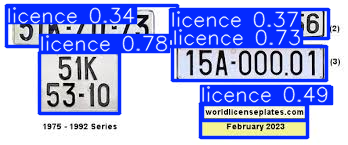

In [ ]:
result1=model('licen4.jpg')
result1[0].show()


image 1/1 /content/traf3.jpg: 448x640 12 cars, 6 trucks, 3 motorbikes, 4 vans, 47.9ms
Speed: 2.6ms preprocess, 47.9ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


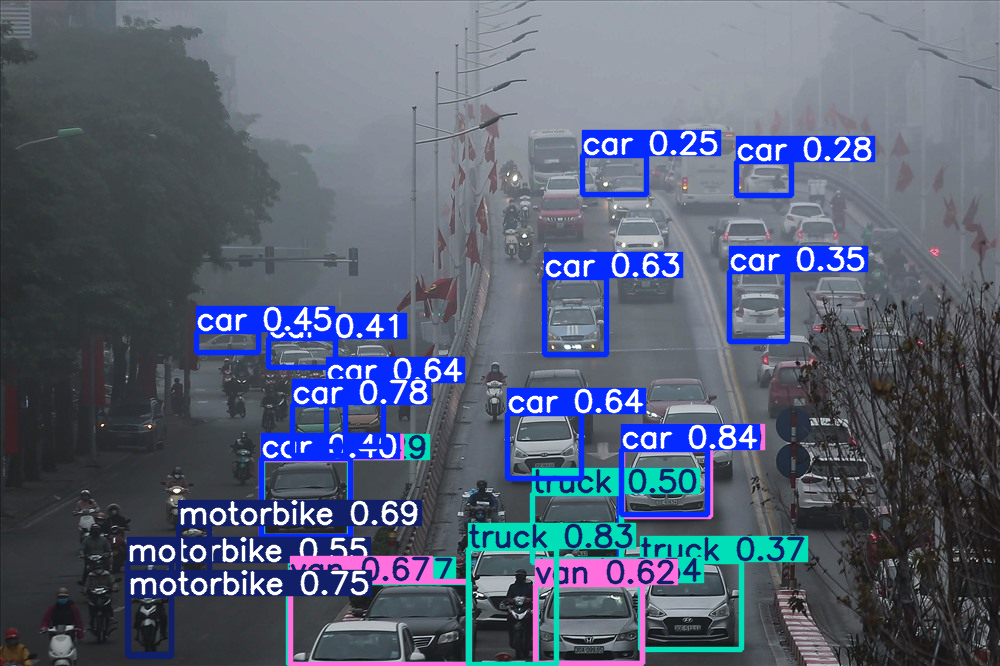

In [ ]:
phuongtien=YOLO("phuongtien.pt")
result2=phuongtien('traf3.jpg')
result2[0].show()

In [ ]:
!yolo val model=bienso.pt data=yolo_plate/data.yaml split=test

Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/yolo_plate/labels/test... 44 images, 0 backgrounds, 0 corrupt: 100% 44/44 [00:00<00:00, 792.10it/s]
val: New cache created: /content/yolo_plate/labels/test.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:01<00:00,  1.98it/s]
                   all         44         53      0.881      0.868      0.903      0.489
Speed: 1.4ms preprocess, 13.9ms inference, 0.0ms loss, 7.2ms postprocess per image
Results saved to runs/detect/val2
💡 Learn more at https://docs.ultralytics.com/modes/val
